In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from collections import Counter
from sklearn.model_selection import train_test_split

In [20]:
file = r'trainingData.csv'
read = pd.read_excel(file)

In [21]:
read

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
read.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [23]:
read.shape

(2129, 40)

In [24]:
X = range(read['NSP'].size)
Y = read['NSP']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(read.drop('CLASS', axis = 1))
scaled_features = scaler.transform(read.drop('CLASS', axis = 1))

df_feat = pd.DataFrame(scaled_features, columns = read.columns[:-1])
df_feat.head()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, read['NSP'], test_size = 0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))


Text(0, 0.5, 'Error Rate')

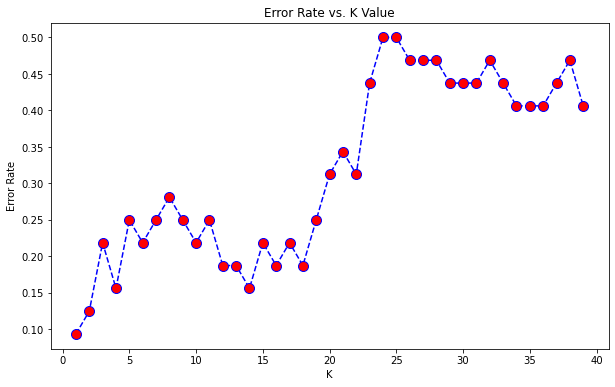

In [18]:
error_rate = []

# Will take some time
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


# NOW WITH K = 3
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 1


[[5 0 1 0 0 0]
 [0 7 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 6 0]
 [0 1 0 1 0 4]]


              precision    recall  f1-score   support

         adi       1.00      0.83      0.91         6
         car       0.88      1.00      0.93         7
         con       0.50      1.00      0.67         1
         fad       0.86      1.00      0.92         6
         gla       1.00      1.00      1.00         6
         mas       1.00      0.67      0.80         6

    accuracy                           0.91        32
   macro avg       0.87      0.92      0.87        32
weighted avg       0.93      0.91      0.91        32

WITH K = 3


[[5 0 1 0 0 0]
 [0 7 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 3 0 3]
 [0 0 0 0 5 1]
 [0 1 0 1 0 4]]


              precision    recall  f1-score   support

         adi       1.00      0.83      0.91         6
         car       0.88      1.00      0.93         7
         con       0.50      1.00      0.67         1
         fad       0.75     